In [1]:
%matplotlib inline

In [2]:
from pycaret.regression import RegressionExperiment
import pickle
import json
import pandas as pd

In [3]:
# Load data
current_time = "2024-11-27T02:59Z"
n_qubits = 4
backend_qpu_name = "ibm_marrakesh"
graph_type = "line"
path = f"./data/{current_time}_{n_qubits}_{backend_qpu_name}_{graph_type}"

data_exact_df = pd.read_json(f"{path}/data_exact_df.json")
data_sim_df = pd.read_json(f"{path}/data_sim_df.json")
data_sim_noisy_df = pd.read_json(f"{path}/data_sim_noisy_df.json")
# data_nmit_df = pd.read_json(f"{path}/data_qpu_nmit_df.json")
# data_mit_df = pd.read_json(f"{path}/data_qpu_mit_df.json")

with open(f"{path}/params.pkl", "rb") as f:
    params = pickle.load(f)

for key, value in params.items():
    print(f"{key}: {value}")

n_samples: 95
n_qubits: 4
backend_qpu_name: ibm_marrakesh
beta: 1
C: 40
n_features: 5
times: [0.0, 0.07853981633974483, 0.15707963267948966, 0.23561944901923448, 0.3141592653589793]
Js: [list([0.5479120971119267, -0.12224312049589536, 0.7171958398227649])
 list([0.3947360581187278, -0.8116453042247009, 0.9512447032735118])
 list([0.5222794039807059, 0.5721286105539076, -0.7437727346489083])
 list([-0.09922812420886573, -0.25840395153483753, 0.8535299776972036])
 list([0.2877302401613291, 0.64552322654166, -0.11317160234533774])
 list([-0.5455225564304462, 0.1091695740316696, -0.8723654877916494])
 list([0.6552623439851641, 0.2633287982441297, 0.5161754801707477])
 list([-0.2909480637402633, 0.9413960487898065, 0.7862422426443954])
 list([0.5567669941475237, -0.6107225842960649, -0.06655799254593164])
 list([-0.9123924684255424, -0.6914210158649043, 0.36609790648490925])
 list([0.48952431181563427, 0.93501946486842, -0.3483492837236961])
 list([-0.25908058793026223, -0.06088837744838416

## Analyze data

In [4]:
# For debugging
data_mit_df = data_exact_df

In [5]:
# Extract features which have overlap with data_mit_df (i.e. successful samples)
data_exact_df = data_exact_df[data_exact_df.index.isin(data_mit_df.sample_id)]

data_sim_df = data_sim_df[data_sim_df.index.isin(data_mit_df.sample_id)]

data_sim_noisy_df = data_sim_noisy_df[
    data_sim_noisy_df.index.isin(data_mit_df.sample_id)
]

# data_nmit_df = data_nmit_df[data_nmit_df.index.isin(data_mit_df.sample_id)]

In [6]:
print("Exact")
display(data_exact_df)

print("Simulator (noise free)")
display(data_sim_df)

print("Simulator (noisy)")
display(data_sim_noisy_df)

# print("no mitigation")
# display(data_nmit_df)

# print("mitigation")
# display(data_mit_df)

Exact


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,expected_value
0,0,1,0.993886,-0.108739,0.975622,-0.216141,0.945442,-0.320885,0.903734,-0.421682,0.285440
1,1,1,0.977627,-0.167849,0.911851,-0.326142,0.806613,-0.465869,0.668207,-0.579078,1.439068
2,2,1,0.994035,0.062086,0.976324,0.122713,0.947416,0.180467,0.908200,0.234027,3.932849
3,3,1,0.996017,-0.079421,0.984116,-0.158142,0.964441,-0.235471,0.937228,-0.310724,0.491069
4,4,1,0.994186,0.036744,0.976877,0.072025,0.948466,0.104419,0.909597,0.132580,3.379307
...,...,...,...,...,...,...,...,...,...,...,...
90,90,1,0.996863,-0.009112,0.987515,-0.017683,0.972138,-0.025185,0.951033,-0.031125,1.308481
91,91,1,0.989297,-0.037190,0.957640,-0.070776,0.906360,-0.097345,0.837605,-0.113849,1.645128
92,92,1,0.985182,-0.117767,0.941374,-0.230105,0.870489,-0.331829,0.775617,-0.418226,1.006801
93,93,1,0.989869,-0.066162,0.960073,-0.132934,0.912343,-0.200663,0.849352,-0.269213,6.247454


Simulator (noise free)


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,expected_value
0,0,1,0.993066,-0.100164,0.976075,-0.199961,0.949413,-0.318755,0.882711,-0.468975,0.285440
1,1,1,0.975836,-0.130900,0.904092,-0.308325,0.810575,-0.478617,0.681115,-0.621561,1.439068
2,2,1,0.994151,0.057608,0.968290,0.124619,0.924670,0.196826,0.906748,0.212151,3.932849
3,3,1,0.995414,-0.112087,0.987587,-0.160345,0.969648,-0.224924,0.943330,-0.300397,0.491069
4,4,1,0.994247,0.015139,0.982135,0.086463,0.935746,0.098512,0.909460,0.140085,3.379307
...,...,...,...,...,...,...,...,...,...,...,...
90,90,1,0.997326,0.002888,0.991811,-0.026847,0.983573,-0.039365,0.951730,-0.007553,1.308481
91,91,1,0.970619,-0.014735,0.960398,-0.044193,0.891100,-0.078378,0.837553,-0.103542,1.645128
92,92,1,0.982182,-0.110846,0.951556,-0.250425,0.880368,-0.318941,0.802035,-0.454043,1.006801
93,93,1,0.984286,-0.090415,0.950204,-0.128038,0.931973,-0.176159,0.868410,-0.292736,6.247454


Simulator (noisy)


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,expected_value
0,0,0.970703,0.911472,-0.113411,0.891181,-0.219292,0.865271,-0.329978,0.837134,-0.365295,0.285440
1,1,0.979492,0.896223,-0.164699,0.845932,-0.324012,0.756614,-0.438319,0.632530,-0.540031,1.439068
2,2,0.970703,0.910333,0.064802,0.909677,0.125895,0.863362,0.190144,0.857258,0.191097,3.932849
3,3,0.968750,0.917108,-0.065056,0.891306,-0.126382,0.867585,-0.231626,0.864540,-0.304827,0.491069
4,4,0.970703,0.909588,0.022556,0.903117,0.077004,0.862532,0.065074,0.838023,0.110433,3.379307
...,...,...,...,...,...,...,...,...,...,...,...
90,90,0.971680,0.913181,-0.011782,0.923607,-0.067947,0.886151,0.005895,0.886937,-0.026052,1.308481
91,91,0.970703,0.926142,-0.021333,0.891041,-0.041838,0.816656,-0.079771,0.784476,-0.079983,1.645128
92,92,0.975586,0.891281,-0.098738,0.869040,-0.213402,0.823681,-0.317109,0.711036,-0.410481,1.006801
93,93,0.972656,0.909751,-0.044045,0.893457,-0.125058,0.843345,-0.170847,0.784980,-0.301601,6.247454


## Exact

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(95, 11)"
4,Transformed data shape,"(95, 10)"
5,Transformed train set shape,"(76, 10)"
6,Transformed test set shape,"(19, 10)"
7,Ignore features,9
8,Numeric features,9
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0151,0.0008,0.0232,0.9998,0.0060,0.0087,0.2500
huber,Huber Regressor,0.2235,0.1851,0.3586,0.9447,0.0900,0.1188,0.0040
br,Bayesian Ridge,0.3802,0.4141,0.4880,0.9002,0.1762,0.3506,0.0050
gbr,Gradient Boosting Regressor,0.5941,1.2516,0.9387,0.7589,0.2181,0.2593,0.0070
et,Extra Trees Regressor,0.5798,1.0606,0.8957,0.7529,0.2123,0.2665,0.0160
ada,AdaBoost Regressor,0.7432,1.3660,1.0077,0.7037,0.2538,0.3788,0.0080
rf,Random Forest Regressor,0.6910,1.3527,1.0416,0.6447,0.2528,0.3256,0.0190
lightgbm,Light Gradient Boosting Machine,0.9428,1.7694,1.2491,0.5018,0.3168,0.4688,0.0220
knn,K Neighbors Regressor,0.8871,1.9426,1.2687,0.4289,0.2918,0.3868,0.0060
ridge,Ridge Regression,1.0621,2.3515,1.4130,0.3336,0.3406,0.5307,0.0030


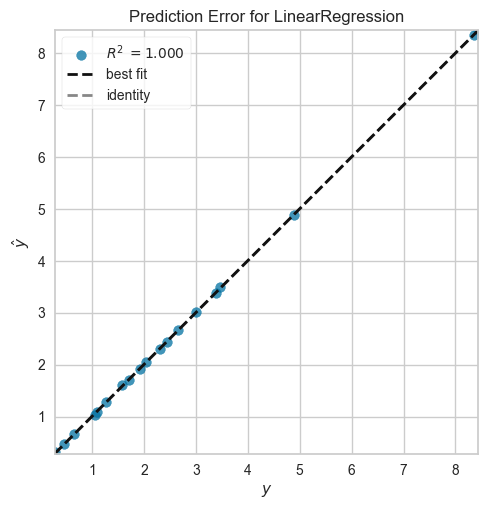

In [7]:
s_exact = RegressionExperiment()
s_exact.setup(
    data=data_exact_df,
    target="expected_value",
    ignore_features="sample_id",
    train_size=0.8,
    session_id=42,
)
best_exact = s_exact.compare_models(turbo=True)

s_exact.plot_model(best_exact, plot="error")

## Trotter (Simulation, Noise free)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(95, 11)"
4,Transformed data shape,"(95, 10)"
5,Transformed train set shape,"(76, 10)"
6,Transformed test set shape,"(19, 10)"
7,Ignore features,9
8,Numeric features,9
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.6463,1.1717,0.9632,0.7415,0.2325,0.2998,0.0130
et,Extra Trees Regressor,0.6357,1.0116,0.9192,0.7198,0.2339,0.3358,0.0160
rf,Random Forest Regressor,0.6902,1.3682,1.0318,0.6741,0.2540,0.3535,0.0210
ada,AdaBoost Regressor,0.8553,1.6129,1.1293,0.6397,0.2945,0.4860,0.0090
huber,Huber Regressor,0.8102,1.8446,1.1989,0.5716,0.2845,0.3346,0.0060
br,Bayesian Ridge,0.8745,1.5602,1.1658,0.4830,0.2855,0.4311,0.0050
knn,K Neighbors Regressor,0.9525,2.1921,1.3733,0.4244,0.3308,0.4921,0.0060
lightgbm,Light Gradient Boosting Machine,0.9935,1.9225,1.3181,0.4000,0.3607,0.5148,0.0180
lr,Linear Regression,0.9423,1.7563,1.2487,0.3824,0.3021,0.5115,0.0040
dt,Decision Tree Regressor,0.7815,2.0443,1.2621,0.3563,0.3122,0.4695,0.0030


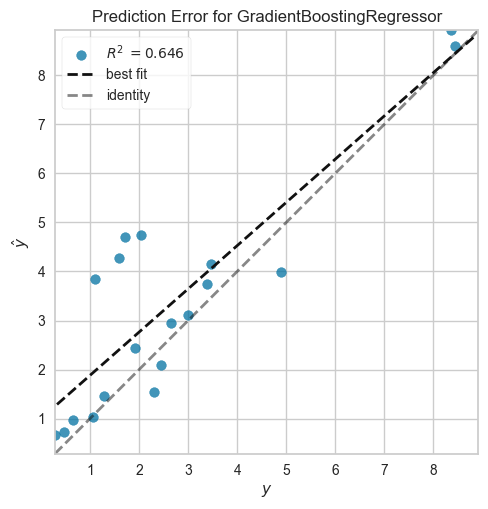

In [8]:
s_sim = RegressionExperiment()
s_sim.setup(
    data=data_sim_df,
    target="expected_value",
    ignore_features="sample_id",
    train_size=0.8,
    session_id=42,
)
best_sim = s_sim.compare_models(turbo=True)

s_sim.plot_model(best_sim, plot="error")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5165,0.9208,0.9596,0.6422,0.2193,0.2397
1,0.5138,0.4357,0.6601,0.9444,0.1958,0.2637
2,1.1424,2.1786,1.4760,0.7738,0.2629,0.3574
3,0.3408,0.1862,0.4315,0.9542,0.1713,0.4055
4,0.9957,1.8876,1.3739,0.8286,0.2634,0.4313
5,0.7978,2.2533,1.5011,0.5720,0.3326,0.3029
6,0.9092,1.3268,1.1519,0.3883,0.2763,0.3462
7,0.3119,0.2853,0.5341,0.3379,0.1958,0.2441
8,0.3086,0.1811,0.4256,0.8997,0.1371,0.1484


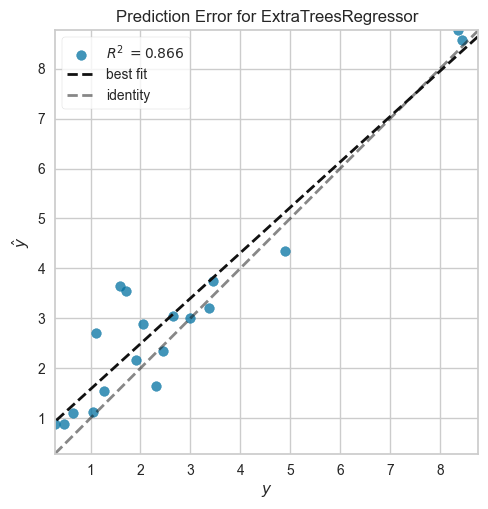

In [9]:
manual_model_sim = s_sim.create_model("et")
s_sim.plot_model(manual_model_sim, plot="error")

## Trotter (Simulation, Noisy)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(95, 11)"
4,Transformed data shape,"(95, 10)"
5,Transformed train set shape,"(76, 10)"
6,Transformed test set shape,"(19, 10)"
7,Ignore features,9
8,Numeric features,9
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.7690,1.5546,1.0877,0.6258,0.2682,0.3781,0.0090
huber,Huber Regressor,0.7935,1.5821,1.1081,0.6218,0.2716,0.3712,0.0040
et,Extra Trees Regressor,0.8084,1.6500,1.1821,0.5501,0.3042,0.4593,0.0160
rf,Random Forest Regressor,0.8254,1.8237,1.1980,0.5414,0.3016,0.4424,0.0220
br,Bayesian Ridge,0.8832,1.5581,1.1408,0.5152,0.2829,0.4304,0.0030
lr,Linear Regression,0.8851,1.4128,1.0999,0.5012,0.2943,0.4956,0.0050
ada,AdaBoost Regressor,0.9665,1.9436,1.2252,0.4896,0.3310,0.5636,0.0090
knn,K Neighbors Regressor,0.9123,2.0279,1.3166,0.4468,0.3150,0.4741,0.0050
lightgbm,Light Gradient Boosting Machine,1.0311,2.1966,1.3633,0.4190,0.3594,0.5618,0.0190
ridge,Ridge Regression,1.1087,2.5278,1.4729,0.2503,0.3646,0.5808,0.0040


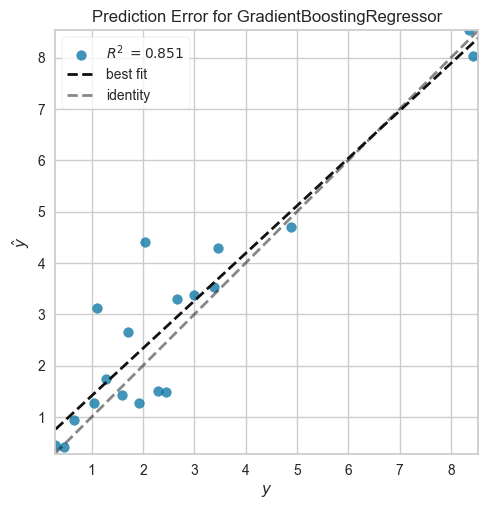

In [10]:
s_sim_noisy = RegressionExperiment()
s_sim_noisy.setup(
    data=data_sim_noisy_df,
    target="expected_value",
    ignore_features="sample_id",
    train_size=0.8,
    session_id=42,
)
best_sim_noisy = s_sim_noisy.compare_models(turbo=True)
s_sim_noisy.plot_model(best_sim_noisy, plot="error")

## Trotter (QPU, no mitigation)

In [13]:
s_nmit = RegressionExperiment()
s_nmit.setup(
    data=data_nmit_df,
    target="expected_value",
    ignore_features="sample_id",
    train_size=0.8,
)
best_nmit = s_nmit.compare_models(turbo=True)

,Description,Value
0,Session id,412
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(20, 11)"
4,Transformed data shape,"(20, 10)"
5,Transformed train set shape,"(16, 10)"
6,Transformed test set shape,"(4, 10)"
7,Ignore features,9
8,Numeric features,9
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1713,0.0433,0.1849,nan,0.1284,3.0614,0.0040
lasso,Lasso Regression,0.2434,0.0976,0.2742,nan,0.2056,5.3766,0.0030
ridge,Ridge Regression,0.1041,0.0168,0.1137,nan,0.0739,1.6470,0.0030
en,Elastic Net,0.2434,0.0976,0.2742,nan,0.2056,5.3766,0.0030
lar,Least Angle Regression,0.5788,0.9734,0.5911,nan,0.2718,5.7578,0.0030
llar,Lasso Least Angle Regression,0.2434,0.0976,0.2742,nan,0.2056,5.3766,0.0040
omp,Orthogonal Matching Pursuit,0.0996,0.0143,0.1038,nan,0.0687,1.9740,0.0030
br,Bayesian Ridge,0.1057,0.0167,0.1117,nan,0.0750,2.0435,0.0030
par,Passive Aggressive Regressor,0.0958,0.0169,0.1049,nan,0.0684,1.3734,0.0110
huber,Huber Regressor,0.2041,0.0526,0.2098,nan,0.1364,3.6394,0.0050


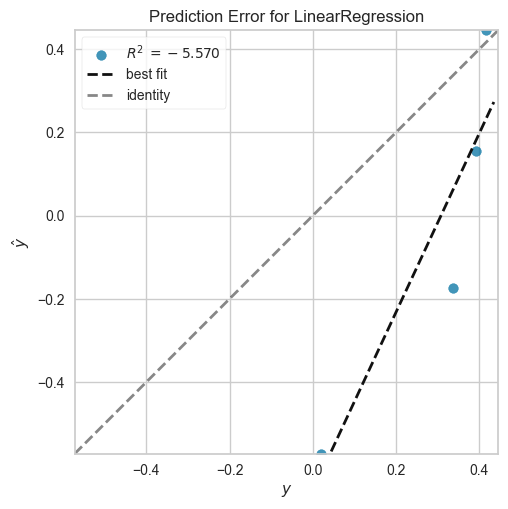

In [14]:
s_nmit.plot_model(best_nmit, plot="error")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2284,0.0779,0.2791,0.4312,0.1665,0.4242
1,0.0694,0.0085,0.0919,-1.5711,0.0732,0.2227
2,0.2044,0.0709,0.2663,0.5607,0.1561,0.3647
3,0.0406,0.0017,0.0411,-0.3849,0.0370,0.3847
4,0.1650,0.0404,0.2010,-2.2546,0.1477,1.9761
5,0.2185,0.0744,0.2728,0.4281,0.1629,0.3784
6,0.0283,0.0008,0.0283,nan,0.0270,0.8654
7,0.0583,0.0034,0.0583,nan,0.0557,3.3328
8,0.0470,0.0022,0.0470,nan,0.0451,2.7362


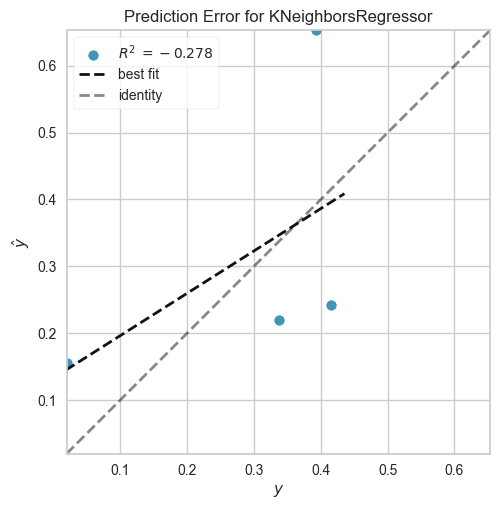

In [15]:
manual_model_nmit = s_nmit.create_model("knn")
s_nmit.plot_model(manual_model_nmit, plot="error")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0872,0.0100,0.1002,0.9267,0.0797,0.4398
1,0.1375,0.0267,0.1635,-7.1293,0.1242,0.6187
2,0.3438,0.1384,0.3720,0.1431,0.2076,1.2178
3,0.1699,0.0457,0.2138,-36.4455,0.1663,1.2859
4,0.2439,0.0656,0.2561,-4.2843,0.1839,5.2700
5,0.1639,0.0313,0.1769,0.7595,0.1322,0.7392
6,0.1130,0.0128,0.1130,nan,0.0450,3.4523
7,0.0163,0.0003,0.0163,nan,0.0159,0.9309
8,0.2774,0.0769,0.2774,nan,0.2142,16.1553


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


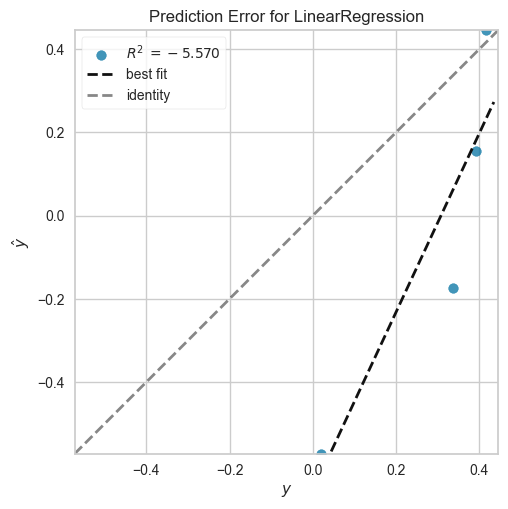

In [16]:
s_nmit.tune_model(best_nmit, optimize="MSE", choose_better=True)
s_nmit.plot_model(best_nmit, plot="error")

## Trotter (QPU, mitigation)

In [17]:
s_mit = RegressionExperiment()
s_mit.setup(
    data=data_mit_df,
    target="expected_value",
    ignore_features="sample_id",
    train_size=0.7,
    session_id=42,
)
best_mit = s_mit.compare_models(turbo=True)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(20, 11)"
4,Transformed data shape,"(20, 10)"
5,Transformed train set shape,"(14, 10)"
6,Transformed test set shape,"(6, 10)"
7,Ignore features,9
8,Numeric features,9
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2992,0.1325,0.3146,nan,0.2172,4.1538,0.0040
lasso,Lasso Regression,0.3122,0.1365,0.3234,nan,0.2349,4.5686,0.0030
ridge,Ridge Regression,0.1121,0.0180,0.1182,nan,0.0784,1.0587,0.0030
en,Elastic Net,0.3122,0.1365,0.3234,nan,0.2349,4.5686,0.0030
lar,Least Angle Regression,0.8240,1.9145,0.8914,nan,0.3977,7.0018,0.0030
llar,Lasso Least Angle Regression,0.3122,0.1365,0.3234,nan,0.2349,4.5686,0.0030
omp,Orthogonal Matching Pursuit,0.0927,0.0111,0.0963,nan,0.0655,1.3269,0.0030
br,Bayesian Ridge,0.1145,0.0163,0.1203,nan,0.0834,1.5337,0.0030
par,Passive Aggressive Regressor,0.1078,0.0188,0.1133,nan,0.0719,1.2811,0.0030
huber,Huber Regressor,0.2060,0.0485,0.2128,nan,0.1496,2.6664,0.0050


In [18]:
holdout_pred_mit = s_mit.predict_model(best_mit)
display(holdout_pred_mit)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1190,0.0224,0.1497,-0.8390,0.1208,2.2802


,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,expected_value,prediction_label
0,0.977539,0.675373,-0.461717,0.211079,-0.562331,-0.055408,-0.295551,0.072809,0.093250,0.019342,0.235783
17,0.982910,0.851413,-0.003989,0.769275,0.036555,0.580047,0.071033,0.342158,0.060244,0.322856,0.384680
15,0.974854,0.827268,-0.157749,0.669568,-0.241860,0.369754,-0.170929,0.049208,-0.017332,0.168328,0.203186
1,0.978271,0.865917,0.167422,0.697617,0.250633,0.454345,0.297072,0.213217,0.242870,0.240820,0.478701
8,0.976807,0.862227,-0.105732,0.670833,-0.101773,0.402173,-0.075471,0.115751,-0.023993,0.162962,0.324032
5,0.981689,0.872747,-0.255196,0.772212,-0.422205,0.666526,-0.534592,0.458052,-0.625221,0.017484,0.019524


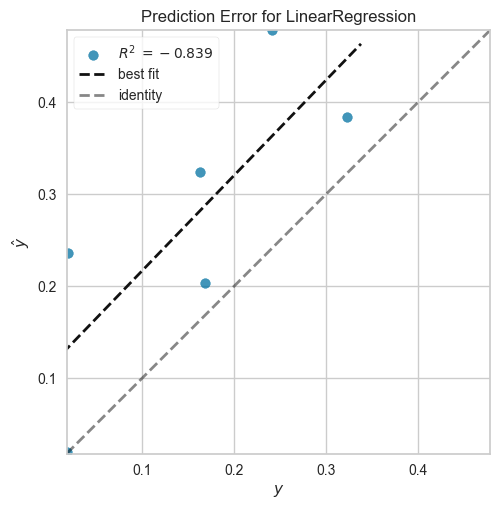

In [19]:
s_mit.plot_model(best_mit, plot="error")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2611,0.0898,0.2997,-0.4695,0.1786,0.3615
1,0.1292,0.0187,0.1369,-12.1809,0.0942,0.3547
2,0.2359,0.0737,0.2714,-1366.3704,0.1881,8.4748
3,0.1787,0.0362,0.1902,-2.9534,0.1572,0.7490
4,0.0863,0.0074,0.0863,nan,0.0444,0.0956
5,0.1655,0.0274,0.1655,nan,0.1213,9.6421
6,0.1555,0.0242,0.1555,nan,0.1316,1.4648
7,0.2225,0.0495,0.2225,nan,0.1253,0.2501
8,0.1499,0.0225,0.1499,nan,0.1304,1.9617


Fitting 10 folds for each of 2 candidates, totalling 20 fits


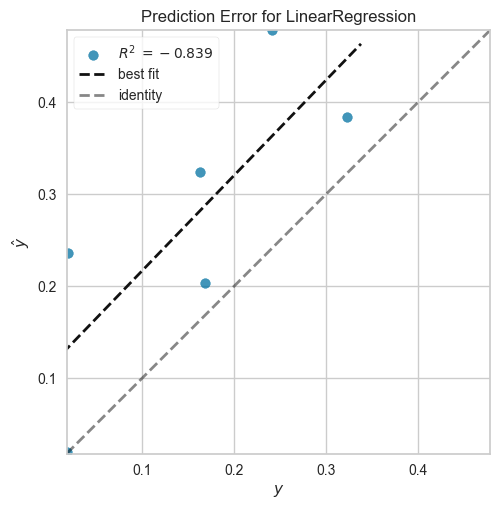

In [20]:
s_mit.tune_model(best_mit, optimize="MSE", choose_better=True)
s_mit.plot_model(best_mit, plot="error")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0506,0.0032,0.0565,0.9478,0.0313,0.0723
1,0.2326,0.0647,0.2544,-44.5072,0.1693,0.6318
2,0.0725,0.0053,0.0726,-96.7787,0.0683,3.0685
3,0.0794,0.0069,0.0833,0.2415,0.0670,0.3400
4,0.2316,0.0536,0.2316,nan,0.1297,0.2564
5,0.0236,0.0006,0.0236,nan,0.0230,1.3768
6,0.0227,0.0005,0.0227,nan,0.0208,0.2142
7,0.3188,0.1016,0.3188,nan,0.1848,0.3583
8,0.0968,0.0094,0.0968,nan,0.0862,1.2675


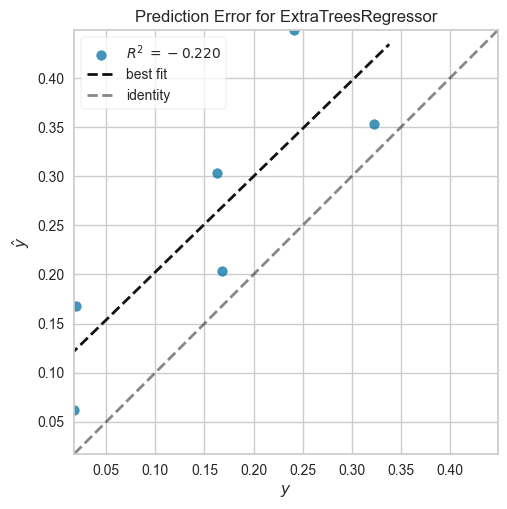

In [21]:
manual_model_mit = s_mit.create_model("et")
s_mit.plot_model(manual_model_mit, plot="error")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3698,0.1978,0.4448,-2.2368,0.2832,0.4865
1,0.0377,0.0017,0.0413,-0.2004,0.0304,0.1024
2,0.3664,0.1343,0.3665,-2491.3827,0.3056,15.8465
3,0.1148,0.0223,0.1495,-1.4411,0.1196,0.7478
4,0.6135,0.3764,0.6135,nan,0.3892,0.6794
5,0.3455,0.1194,0.3455,nan,0.2925,20.1269
6,0.2502,0.0626,0.2502,nan,0.2039,2.3561
7,0.5921,0.3505,0.5921,nan,0.3759,0.6655
8,0.2851,0.0813,0.2851,nan,0.2350,3.7314


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


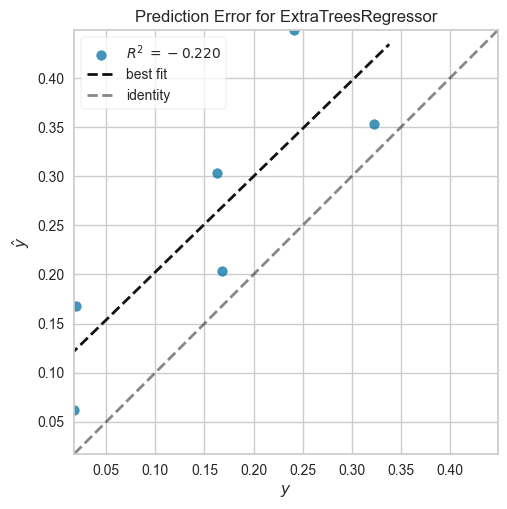

In [22]:
tuned_manual_model_mit = s_mit.tune_model(manual_model_mit, optimize="R2")
s_mit.plot_model(tuned_manual_model_mit, plot="error")